Sprint - 3

Team Id : PNT2022TMID18280

Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps
import numpy

Load the data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Analyse the data

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[11]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [5]:
y_train[11]

5

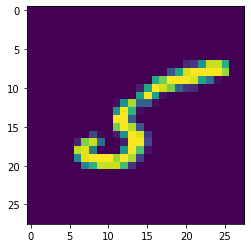

In [6]:
plt.imshow(X_train[11])

Data Preprocessing

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [8]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
Y_train[11]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Create the model

In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

Compile the model

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

Train the model

In [12]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 156s 80ms/step - loss: 0.1868 - accuracy: 0.9562 - val_loss: 0.1039 - val_accuracy: 0.9710
Epoch 2/5
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0631 - accuracy: 0.9804 - val_loss: 0.0729 - val_accuracy: 0.9772
Epoch 3/5
1875/1875 [==============================] - 105s 56ms/step - loss: 0.0449 - accuracy: 0.9863 - val_loss: 0.0852 - val_accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 112s 60ms/step - loss: 0.0319 - accuracy: 0.9901 - val_loss: 0.0867 - val_accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 107s 57ms/step - loss: 0.0280 - accuracy: 0.9918 - val_loss: 0.1070 - val_accuracy: 0.9770


Test the model

In [13]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.10703231394290924, 0.9769999980926514]


In [14]:
prediction = model.predict(X_test[:6])
print(prediction)

1/1 [==============================] - 0s 125ms/step
[[1.82440243e-17 9.23700130e-22 3.95411541e-13 2.11709712e-11
  3.86267359e-24 1.09142451e-20 1.20288994e-22 1.00000000e+00
  4.78954886e-16 3.41819782e-17]
 [6.05446498e-16 1.33414058e-09 1.00000000e+00 3.27793111e-14
  1.54089925e-21 4.88349905e-21 2.65733630e-10 8.54905161e-23
  1.91871026e-15 3.95110264e-19]
 [5.99293559e-10 9.99998093e-01 5.90252558e-09 5.20718024e-10
  1.86662669e-06 4.69564443e-10 8.95230468e-09 1.51325641e-09
  8.94976093e-09 5.10955731e-12]
 [1.00000000e+00 2.15010504e-18 4.05344898e-12 1.35167981e-18
  4.63193276e-15 5.52605216e-13 1.31965106e-10 3.46993466e-17
  3.41261375e-14 2.73878638e-15]
 [7.65033435e-20 1.28176806e-17 2.68600413e-18 1.54838046e-16
  1.00000000e+00 5.42119905e-19 7.54938503e-21 1.68726001e-22
  5.04583224e-19 2.70594813e-16]
 [6.51181799e-12 1.00000000e+00 1.13593304e-12 6.05796229e-13
  2.49637218e-08 8.36061363e-14 8.85016973e-12 3.06412566e-08
  3.99814191e-08 2.84396725e-12]]


In [15]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:6])

[7 2 1 0 4 1]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Save the model

In [16]:
model.save("Model.h5")

In [17]:
model=load_model("Model.h5")